# Plot the landscape: ABM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import random

## Histograms and corr matrix

In [490]:
# open the file
accepted_params_init = pd.read_csv('abm_final_results_accepted_params.csv')
columns = accepted_params_init["Unnamed: 0"]
columns = columns[0:75].tolist()
accepted_params_df = accepted_params_init.drop(["Unnamed: 0"], axis=1)

# reformat the data
split_data = np.split(accepted_params_df,100)


In [491]:
split_data_np = np.hstack(split_data)
df = pd.DataFrame(split_data_np).transpose()
df.columns = columns
accepted_params = df.drop(["run_number", 'introduced_species_stocking_forecast', 'exmoor_stocking_forecast', 'tamworthPig_stocking_forecast', 'cattle_stocking_forecast', 'fallowDeer_stocking_forecast', 'exmoor_stocking', 'redDeer_stocking_forecast', 'tamworthPig_stocking', 'redDeer_stocking', 'cattle_stocking', 'fallowDeer_stocking', 'reindeer_gain_from_young_scrub', 'reindeer_gain_from_saplings', 'reindeer_gain_from_scrub', 'reindeer_gain_from_trees', 'reindeer_gain_from_grass', 'reindeer_reproduce', 'european_elk_gain_from_young_scrub', 'european_elk_gain_from_saplings', 'european_elk_gain_from_scrub', 'european_elk_gain_from_trees','european_elk_gain_from_grass', 'european_elk_reproduce', 'european_bison_gain_from_young_scrub', "european_bison_gain_from_saplings", 'european_bison_gain_from_young_scrub', 'european_bison_gain_from_scrub', 'european_bison_gain_from_trees', 'european_bison_gain_from_grass', 'european_bison_reproduce', 'initial_roe'], axis=1)

accepted_params.to_csv("abm_final_results_accepted_params_reshaped.csv")

<AxesSubplot:>

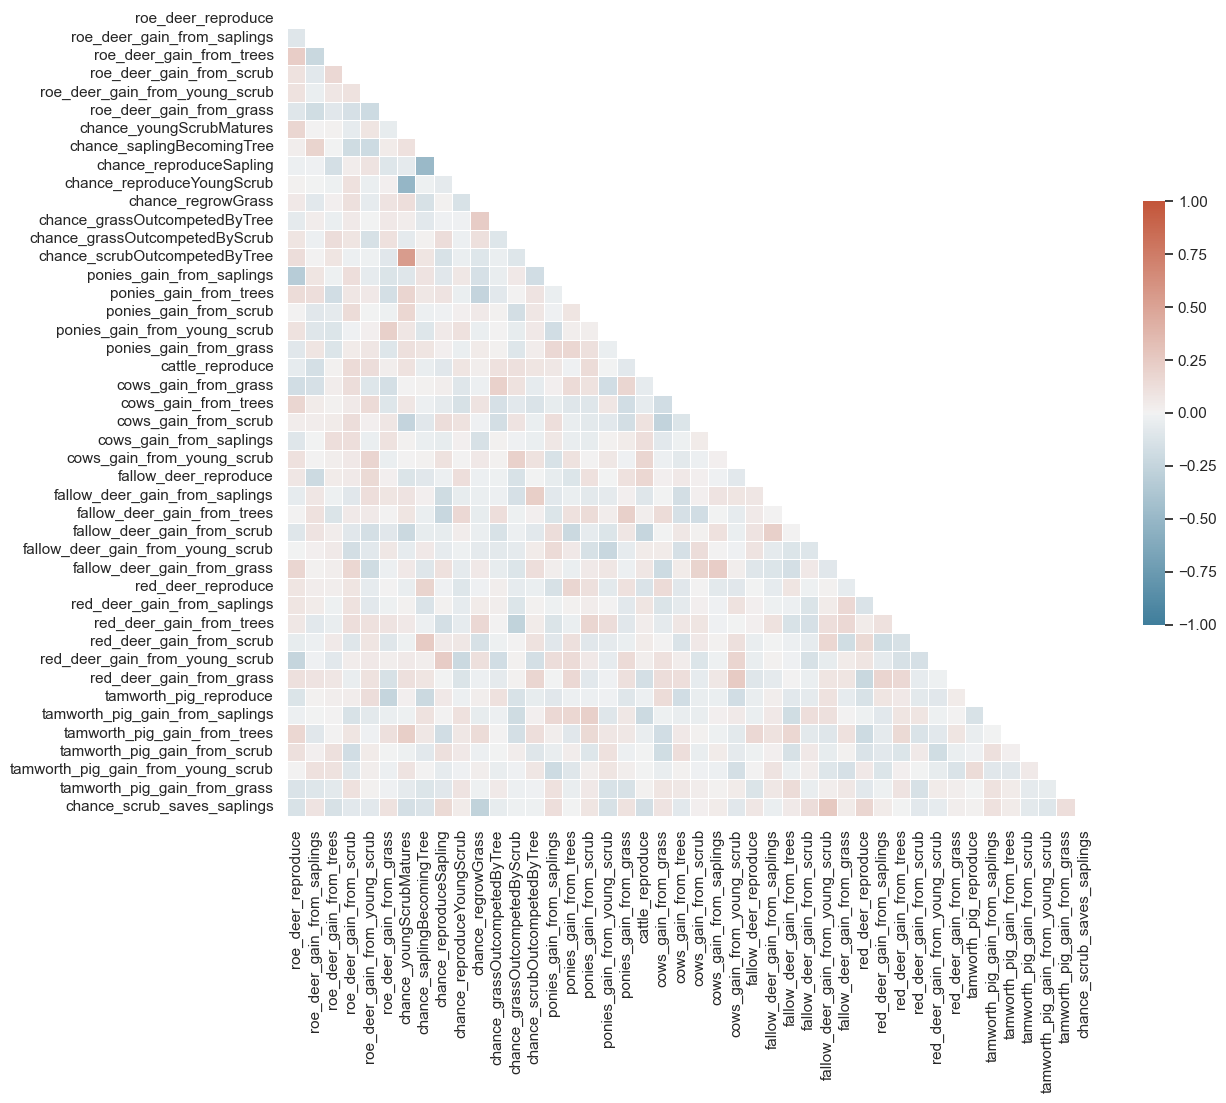

In [492]:
corr = accepted_params.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_68999/2554904913.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  accepted_params.hist(ax=axis)


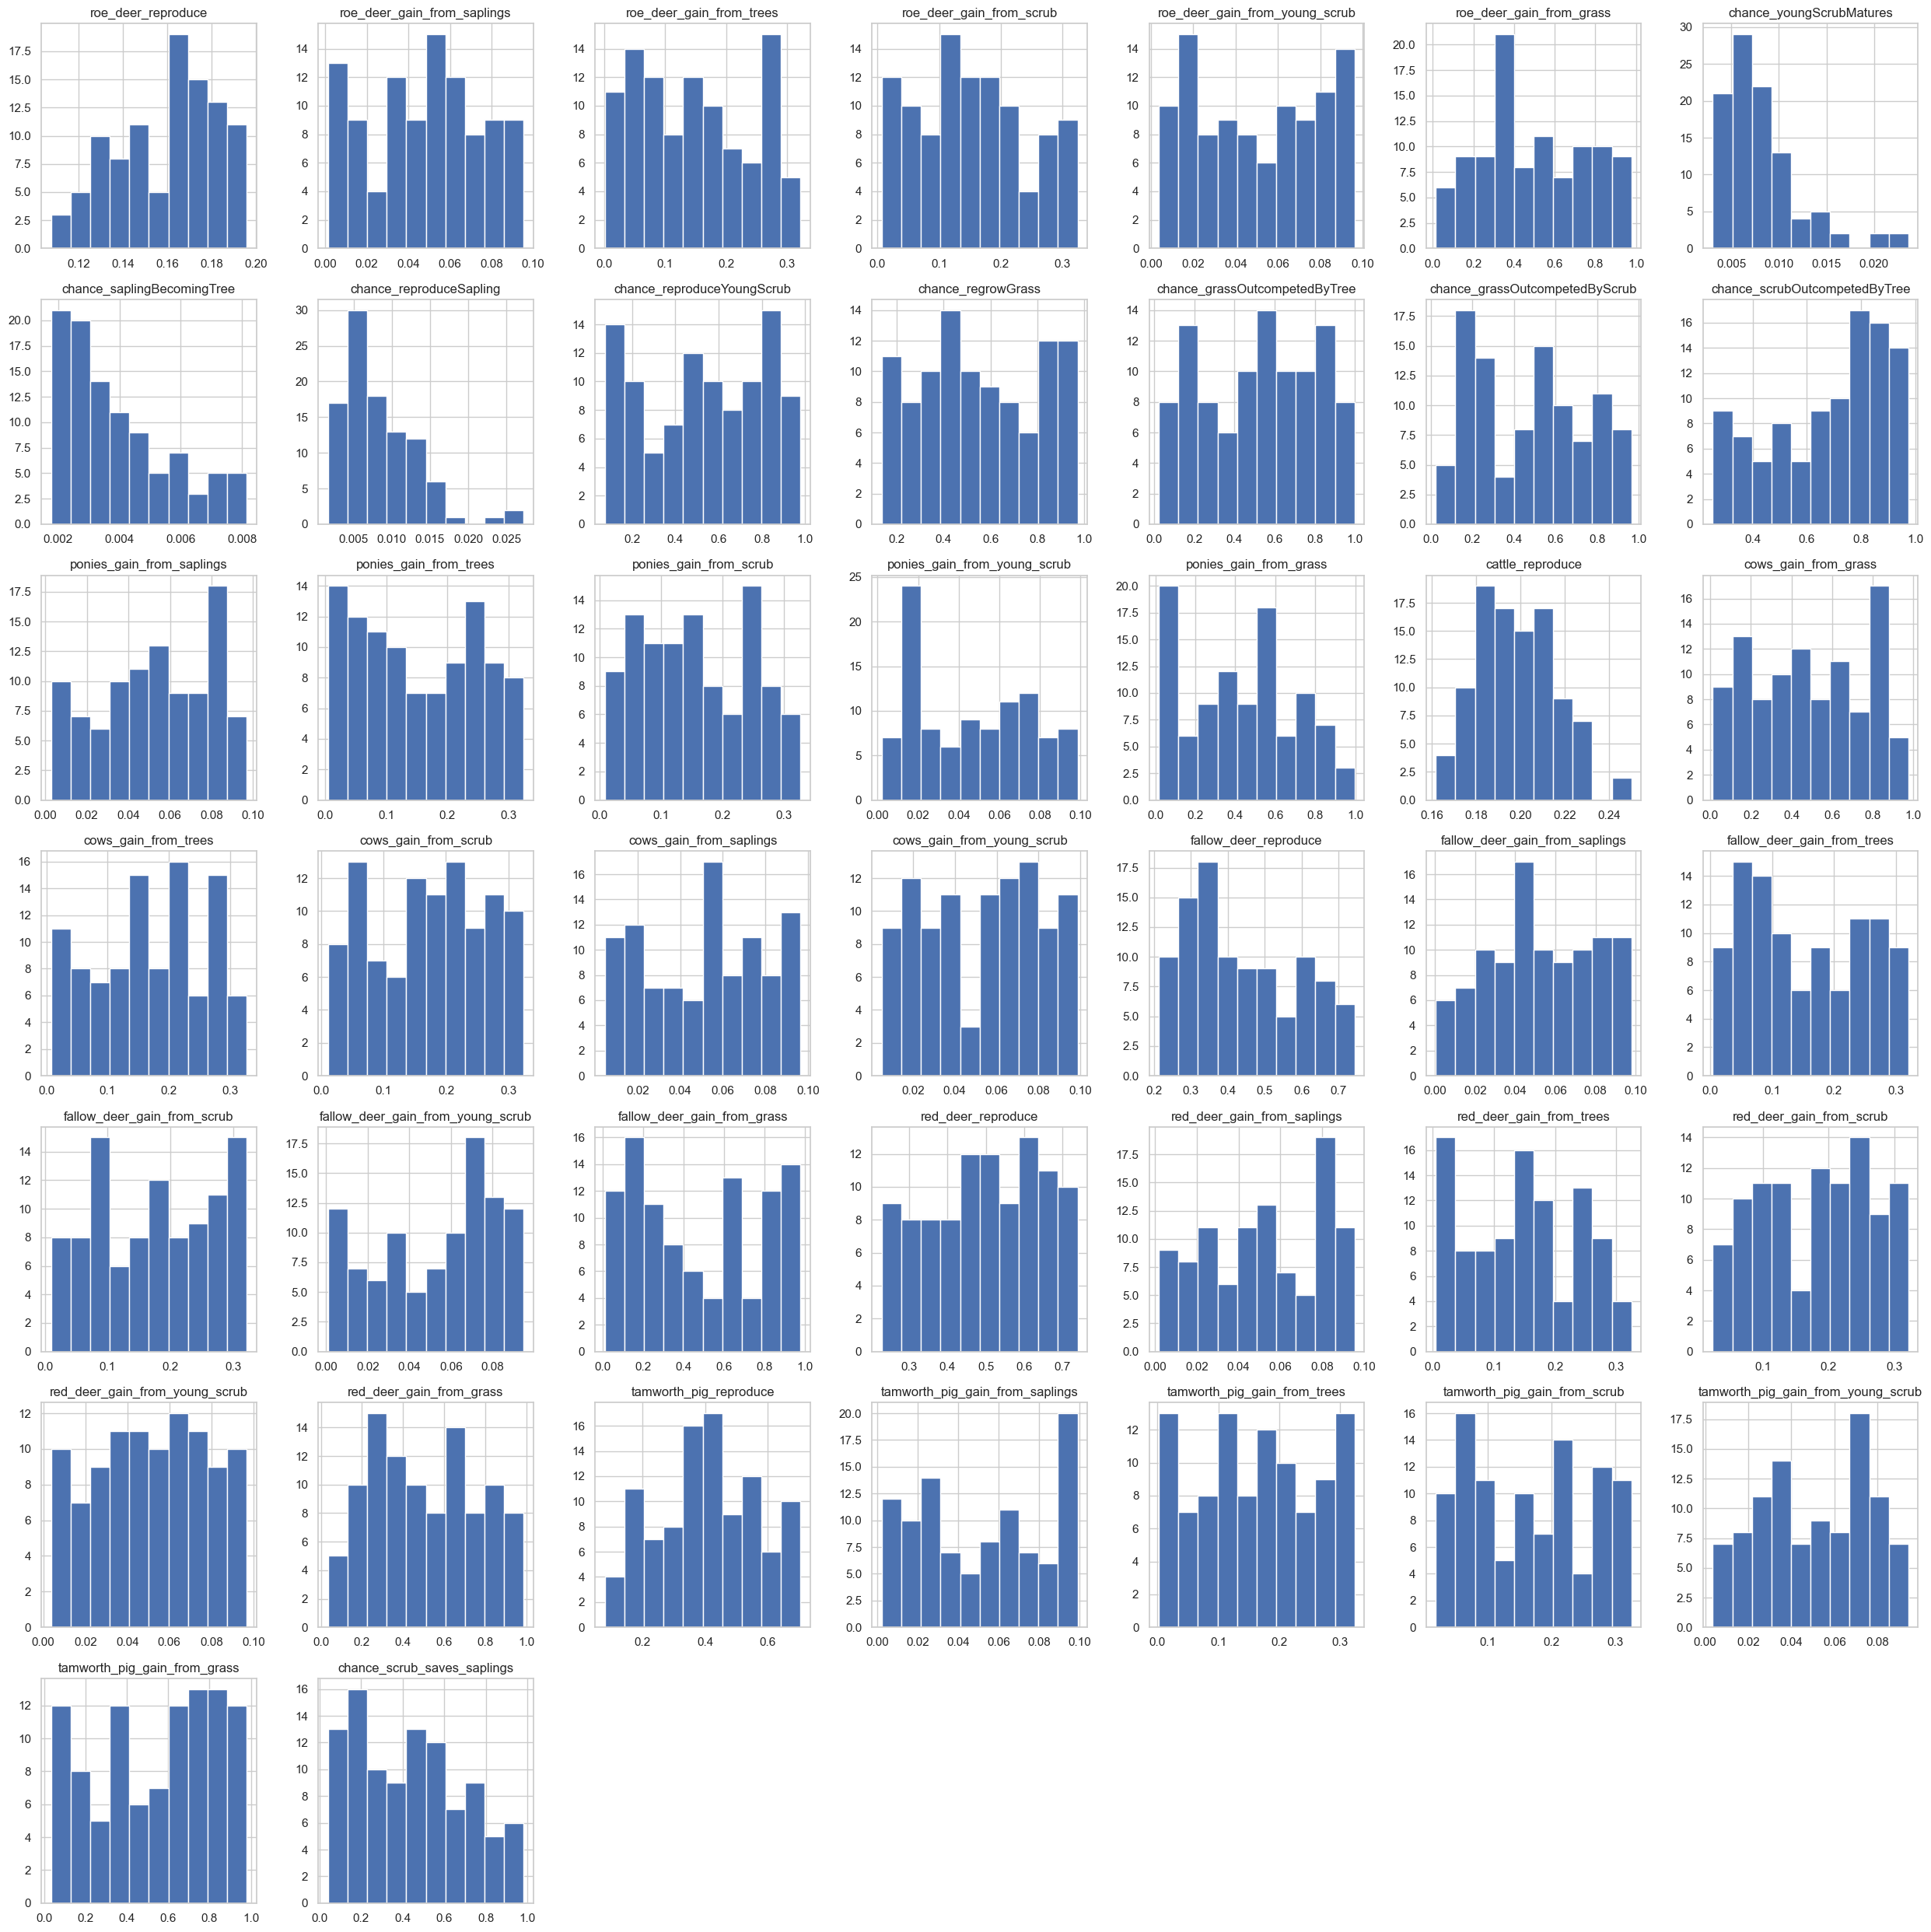

In [493]:
# show where the best fit params are in the histograms
fig, axis = plt.subplots(figsize=(25, 25))
# accepted_params.hist(ax=axis, range=[0,1]) # no ranges specified
accepted_params.hist(ax=axis)

fig.tight_layout() 

## What is the landscape of the top 100 runs (same initial conditions)?

In [794]:
all_runs = pd.read_csv('abm_final_results_accepted_timeseries.csv').drop(['Unnamed: 0'], axis=1).reset_index(drop=True)

In [795]:
final_df = {}

for my_run in all_runs.run_number.unique():

    my_df = all_runs.loc[all_runs["run_number"] == my_run]

    habs_only = my_df[['Time', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground', 'Roe deer', 'run_number']]

    initial = habs_only.loc[habs_only["Time"] == 1]
    end = habs_only.loc[habs_only["Time"] == 5999]
       
    # then append outputs
    final_df[my_run] = {"Grassland Initial": initial["Grassland"].item(), "Grassland End": end['Grassland'].item(), 
                            "Woodland Initial": initial["Woodland"].item(), "Woodland End":  end['Woodland'].item(), 
                            "Thorny Scrub Initial": initial["Thorny Scrub"].item(), "Thorny Scrub End":  end['Thorny Scrub'].item(), 
                            "Run Number": my_run
    }


df = pd.DataFrame.from_dict(final_df, "index").reset_index(drop=True)

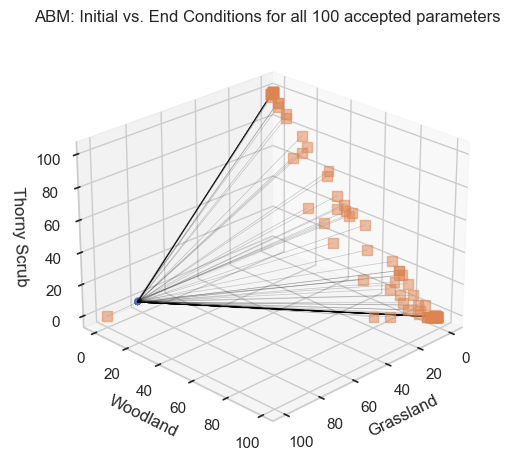

In [498]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
            [df['Woodland Initial'][i], df['Woodland End'][i]],
            [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# rotate view
ax.view_init(25, 45)

plt.title('ABM: Initial vs. End Conditions for all 100 accepted parameters')

plt.tight_layout()

# Show the plot
plt.show()

In [796]:
x = df.loc[df["Woodland End"] > 50]
x.loc[x["Thorny Scrub End"] > 20]

# 5% grassland, 27% scrub, 56% woodland

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Run Number
15,88,7,6,64,6,29,73238.0
23,88,16,6,52,6,32,15797.0
34,87,3,6,51,7,45,56363.0
50,88,2,6,74,7,24,26382.0
61,88,2,6,58,6,40,3783.0
67,88,5,6,51,7,44,370.0


## Landscape graph

In [499]:
# organise these ones
dft_1 = pd.read_csv('abm_landscape_timeseries_stocking_density_10.csv').drop(["Unnamed: 0"], axis=1)
initial_1 = dft_1[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[0]
end_1 = dft_1[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[-1]
# collect their conditions
df26 = {"Grassland Initial": initial_1['Grassland'].item(), "Grassland End": end_1['Grassland'].item(), 
                    "Woodland Initial": initial_1['Woodland'].item(), "Woodland End": end_1['Woodland'].item(), 
                    "Thorny Scrub Initial": initial_1['Thorny Scrub'].item(), "Thorny Scrub End": end_1['Thorny Scrub'].item(), 
                    "Stocking Density": 10,
                    "Run Number": 1}
df26 = pd.DataFrame.from_dict(df26, "index").transpose()

dft_2 = pd.read_csv('abm_landscape_timeseries_stocking_density_25.csv').drop(["Unnamed: 0"], axis=1)
initial_2 = dft_2[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[0]
end_2 = dft_2[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[-1]
# collect their conditions
df27 = {"Grassland Initial": initial_2['Grassland'].item(), "Grassland End": end_2['Grassland'].item(), 
                    "Woodland Initial": initial_2['Woodland'].item(), "Woodland End": end_2['Woodland'].item(), 
                    "Thorny Scrub Initial": initial_2['Thorny Scrub'].item(), "Thorny Scrub End": end_2['Thorny Scrub'].item(), 
                    "Stocking Density": 25,
                    "Run Number": 1}
df27 = pd.DataFrame.from_dict(df27, "index").transpose()


dft_3 = pd.read_csv('abm_landscape_timeseries_stocking_density_50.csv').drop(["Unnamed: 0"], axis=1)
initial_3 = dft_3[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[0]
end_3 = dft_3[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[-1]
# collect their conditions
df28 = {"Grassland Initial": initial_3['Grassland'].item(), "Grassland End": end_3['Grassland'].item(), 
                    "Woodland Initial": initial_3['Woodland'].item(), "Woodland End": end_3['Woodland'].item(), 
                    "Thorny Scrub Initial": initial_3['Thorny Scrub'].item(), "Thorny Scrub End": end_3['Thorny Scrub'].item(), 
                    "Stocking Density": 50,
                    "Run Number": 1}
df28 = pd.DataFrame.from_dict(df28, "index").transpose()



dft_4 = pd.read_csv('abm_landscape_timeseries_stocking_density_75.csv').drop(["Unnamed: 0"], axis=1)
initial_4 = dft_4[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[0]
end_4 = dft_4[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[-1]
# collect their conditions
df29 = {"Grassland Initial": initial_4['Grassland'].item(), "Grassland End": end_4['Grassland'].item(), 
                    "Woodland Initial": initial_4['Woodland'].item(), "Woodland End": end_4['Woodland'].item(), 
                    "Thorny Scrub Initial": initial_4['Thorny Scrub'].item(), "Thorny Scrub End": end_4['Thorny Scrub'].item(), 
                    "Stocking Density": 75,
                    "Run Number": 1}
df29 = pd.DataFrame.from_dict(df29, "index").transpose()



dft_5 = pd.read_csv('abm_landscape_timeseries_stocking_density_100.csv').drop(["Unnamed: 0"], axis=1)
initial_5 = dft_5[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[0]
end_5 = dft_5[['Grassland', 'Woodland', 'Thorny Scrub', 'Roe deer']].iloc[-1]
# collect their conditions
df30 = {"Grassland Initial": initial_5['Grassland'].item(), "Grassland End": end_5['Grassland'].item(), 
                    "Woodland Initial": initial_5['Woodland'].item(), "Woodland End": end_5['Woodland'].item(), 
                    "Thorny Scrub Initial": initial_5['Thorny Scrub'].item(), "Thorny Scrub End": end_5['Thorny Scrub'].item(), 
                    "Stocking Density": 100,
                    "Run Number": 1}
df30 = pd.DataFrame.from_dict(df30, "index").transpose()


In [789]:
# open the file
df1 = pd.read_csv('resilience_landscape_1.csv').drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('resilience_landscape_2.csv').drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('resilience_landscape_3.csv').drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('resilience_landscape_4.csv').drop(['Unnamed: 0'], axis=1)
df5 = pd.read_csv('resilience_landscape_5.csv').drop(['Unnamed: 0'], axis=1)
df6 = pd.read_csv('resilience_landscape_6.csv').drop(['Unnamed: 0'], axis=1)
df7 = pd.read_csv('resilience_landscape_7.csv').drop(['Unnamed: 0'], axis=1)
df8 = pd.read_csv('resilience_landscape_8.csv').drop(['Unnamed: 0'], axis=1)
df9 = pd.read_csv('resilience_landscape_9.csv').drop(['Unnamed: 0'], axis=1)
df10 = pd.read_csv('resilience_landscape_10.csv').drop(['Unnamed: 0'], axis=1)
df11 = pd.read_csv('resilience_landscape_11.csv').drop(['Unnamed: 0'], axis=1)
df12 = pd.read_csv('resilience_landscape_12.csv').drop(['Unnamed: 0'], axis=1)
df13 = pd.read_csv('resilience_landscape_13.csv').drop(['Unnamed: 0'], axis=1)
df14 = pd.read_csv('resilience_landscape_14.csv').drop(['Unnamed: 0'], axis=1)
df15 = pd.read_csv('resilience_landscape_15.csv').drop(['Unnamed: 0'], axis=1)
df16 = pd.read_csv('resilience_landscape_16.csv').drop(['Unnamed: 0'], axis=1)
df17 = pd.read_csv('resilience_landscape_17.csv').drop(['Unnamed: 0'], axis=1)
df18 = pd.read_csv('resilience_landscape_18.csv').drop(['Unnamed: 0'], axis=1)
df19 = pd.read_csv('resilience_landscape_19.csv').drop(['Unnamed: 0'], axis=1)
df20 = pd.read_csv('resilience_landscape_20.csv').drop(['Unnamed: 0'], axis=1)
df22 = pd.read_csv('resilience_landscape_22.csv').drop(['Unnamed: 0'], axis=1)
df21 = pd.read_csv('resilience_landscape_21.csv').drop(['Unnamed: 0'], axis=1)
df23 = pd.read_csv('resilience_landscape_23.csv').drop(['Unnamed: 0'], axis=1)
df24 = pd.read_csv('resilience_landscape_24.csv').drop(['Unnamed: 0'], axis=1)
df25 = pd.read_csv('resilience_landscape_25.csv').drop(['Unnamed: 0'], axis=1)

df31 = pd.read_csv('resilience_landscape_28.csv').drop(['Unnamed: 0'], axis=1)
df32 = pd.read_csv('resilience_landscape_31.csv').drop(['Unnamed: 0'], axis=1)
df33 = pd.read_csv('resilience_landscape_27.csv').drop(['Unnamed: 0'], axis=1)
df34 = pd.read_csv('resilience_landscape_30.csv').drop(['Unnamed: 0'], axis=1)
df35 = pd.read_csv('resilience_landscape_33.csv').drop(['Unnamed: 0'], axis=1)
df36 = pd.read_csv('resilience_landscape_26.csv').drop(['Unnamed: 0'], axis=1)
df37 = pd.read_csv('resilience_landscape_36.csv').drop(['Unnamed: 0'], axis=1)
df38 = pd.read_csv('resilience_landscape_29.csv').drop(['Unnamed: 0'], axis=1)


df2["Run Number"] += 10
df3["Run Number"] += 20
df4["Run Number"] += 30
df5["Run Number"] += 40
df6["Run Number"] += 50
df7["Run Number"] += 60
df8["Run Number"] += 70
df9["Run Number"] += 80
df10["Run Number"] += 90
df11["Run Number"] += 92
df12["Run Number"] += 94
df13["Run Number"] += 96
df14["Run Number"] += 98
df15["Run Number"] += 100
df16["Run Number"] += 102
df17["Run Number"] += 104
df18["Run Number"] += 106
df19["Run Number"] += 108
df20["Run Number"] += 110
df21["Run Number"] += 112
df22["Run Number"] += 114
df23["Run Number"] += 116
df24["Run Number"] += 118
df25["Run Number"] += 120
df26["Run Number"] += 121 # 1
df27["Run Number"] += 122 # 1
df28["Run Number"] += 123 # 1
df29["Run Number"] += 124 # 1
df30["Run Number"] += 125 # 1
df31["Run Number"] += 127
df32["Run Number"] += 129
df33["Run Number"] += 131
df34["Run Number"] += 133
df35["Run Number"] += 135
df36["Run Number"] += 137
df37["Run Number"] += 139
df38["Run Number"] += 131


df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38], axis=0).reset_index(drop=True)

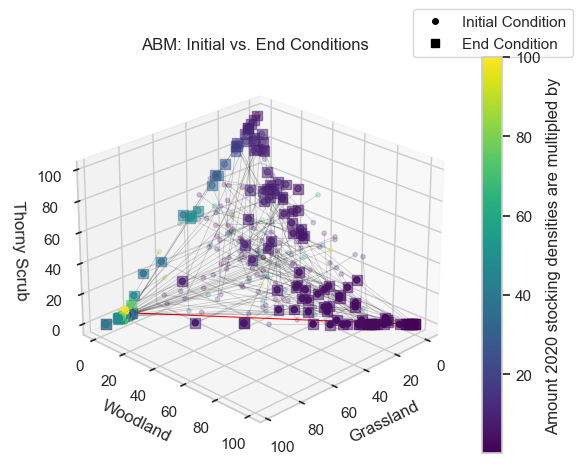

In [501]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],c=df['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1.0:  # Selecting run number 1

        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Add legend for initial and end conditions
legend_handles = [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='End Condition')]

ax.legend(handles=legend_handles, loc=[0.9,1])

cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ABM: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

In [601]:
x = df.loc[df["Stocking Density"] > 48]
x.loc[x["Stocking Density"] < 55]

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Stocking Density,Run Number
102,22,85,52,0,26,0,52.066280,94
121,37,90,10,0,53,0,49.878191,113
124,59,90,27,0,14,1,49.641139,116
125,37,87,8,0,55,0,49.821268,117
127,33,45,34,0,33,47,49.764840,119
133,88,44,6,0,6,48,50.000000,370
151,33,89,34,0,32,0,48.057614,133


# End states of only best PS (same SD)

In [506]:
# # or look at this one for best PS only (same stocking densities, changed initial condits)
df_best = pd.read_csv('resilience_landscape_bestPS_changeinitialcondit.csv').drop(['Unnamed: 0'], axis=1)

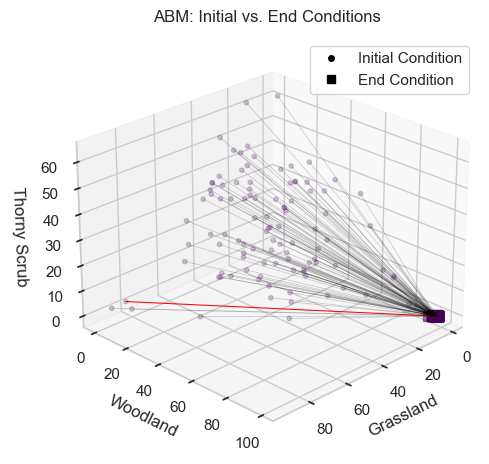

In [507]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df_best['Grassland Initial'], df_best['Woodland Initial'], df_best['Thorny Scrub Initial'],c=df_best['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df_best['Grassland End'], df_best['Woodland End'], df_best['Thorny Scrub End'],  c=df_best['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df_best)):
    if df_best['Run Number'][i] == 1.0:  # Selecting run number 1

        ax.plot([df_best['Grassland Initial'][i], df_best['Grassland End'][i]],
                [df_best['Woodland Initial'][i], df_best['Woodland End'][i]],
                [df_best['Thorny Scrub Initial'][i], df_best['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df_best['Grassland Initial'][i], df_best['Grassland End'][i]],
                [df_best['Woodland Initial'][i], df_best['Woodland End'][i]],
                [df_best['Thorny Scrub Initial'][i], df_best['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Add legend for initial and end conditions
legend_handles = [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='End Condition')]

ax.legend(handles=legend_handles, loc=[0.6,0.85])


# rotate view
ax.view_init(25, 45)

plt.title('ABM: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

# Now look without initial conditions (only end states)

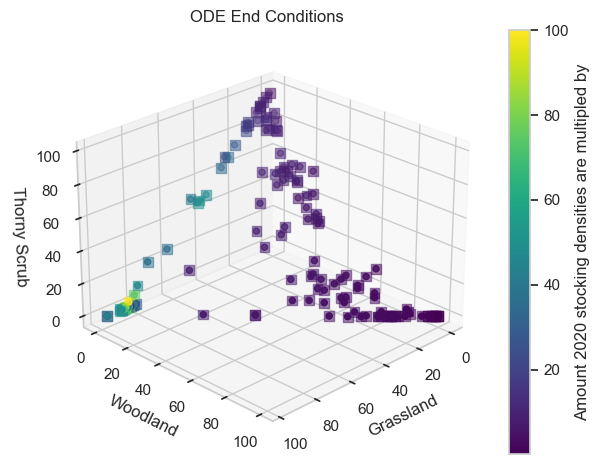

In [508]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

# Spatial sensitivity test

In [28]:
df = pd.read_csv('resilience_landscape_10runs_normal_space.csv').drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('resilience_landscape_10runs_new_space.csv').drop(['Unnamed: 0'], axis=1)

In [34]:
df

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Stocking Density,Run Number
0,88,0,6,100,6,0,0,1
1,88,6,6,80,6,14,1,2
2,88,4,6,30,6,66,2,3
3,88,5,6,18,6,77,3,4
4,88,3,6,5,6,92,5,5
5,88,7,6,0,6,93,10,6
6,88,16,6,0,6,78,25,7
7,88,39,6,0,6,54,50,8
8,88,63,6,0,6,28,75,9
9,88,54,6,0,6,35,100,10


In [36]:
df2

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Stocking Density,Run Number
0,88,0,6,100,6,0,0,1
1,88,8,6,52,6,40,1,2
2,88,9,6,15,6,76,2,3
3,88,8,6,11,6,81,3,4
4,88,12,6,2,6,86,5,5
5,88,25,6,0,6,75,10,6
6,88,34,6,0,6,62,25,7
7,88,39,6,0,6,55,50,8
8,88,49,6,0,6,40,75,9
9,88,52,6,3,6,32,100,10


In [45]:
abs(df.loc[df["Stocking Density"] == 100] - df2.loc[df2["Stocking Density"] == 100]) / ((df.loc[df["Stocking Density"] == 100] + df2.loc[df2["Stocking Density"] == 100])/2)

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Stocking Density,Run Number
9,0.0,0.037736,0.0,2.0,0.0,0.089552,0.0,0.0


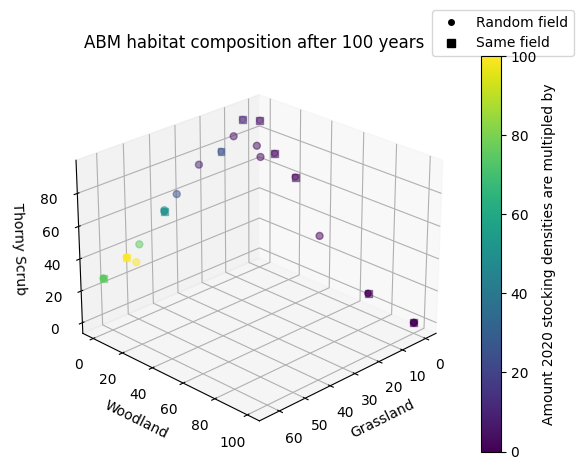

In [31]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
end_marker = 's'
initial_marker = 'o'

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'], c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=25, alpha=0.5)
initial_scatter = ax.scatter(df2['Grassland End'], df2['Woodland End'], df2['Thorny Scrub End'],c=df2['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=25, alpha=0.5)


legend_handles = [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Random field'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='Same field')]

ax.legend(handles=legend_handles, loc=[0.95,1])

cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')

# rotate view
ax.view_init(25, 45)

plt.title('ABM habitat composition after 100 years')

plt.tight_layout()

# Show the plot
plt.show()

# When does the best run reach equilibrium?

In [537]:
df_timeseries = pd.read_csv('abm_final_results_accepted_timeseries.csv').drop(["Unnamed: 0"], axis=1)
df_timeseries = df_timeseries.loc[df_timeseries["run_number"] == 37968.0]

In [538]:
# graph best run
final_df = pd.DataFrame(
                (df_timeseries[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()), columns=['Abundance %'])
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(df_timeseries['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(df_timeseries)))

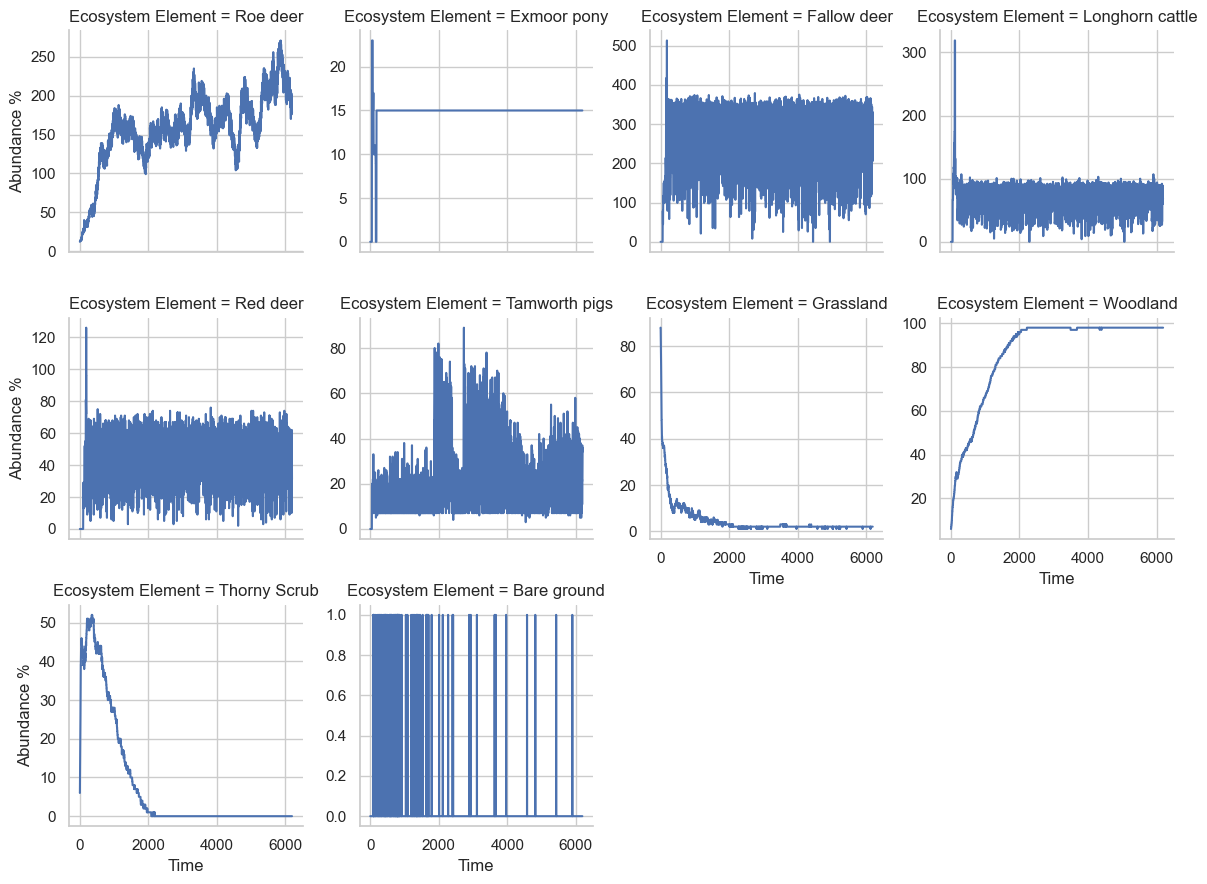

In [539]:
# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
f = sns.FacetGrid(final_df, col="Ecosystem Element", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Abundance %')
plt.show()

## No initial conditions

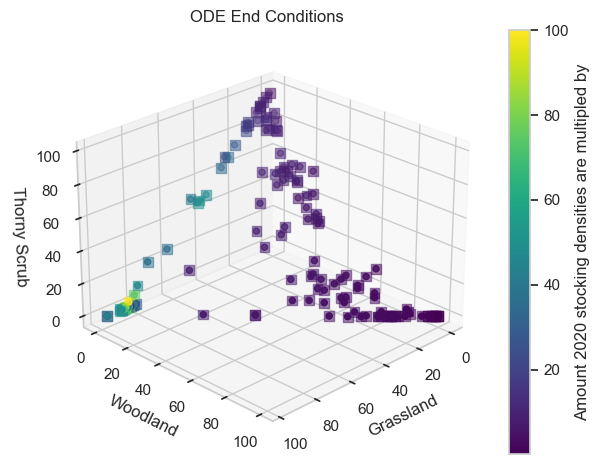

In [540]:
# now look at only end conditions and add labels 
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

# Perturbation 1

In [704]:
df = pd.read_csv('experiment_growth_test.csv').drop(['Unnamed: 0'], axis=1)
df["Time"] = df['Time'].div(12)
df["Duration"] = df['Duration'].div(12)
df = df.loc[df["Time"] >= 200].reset_index()

In [639]:
df.loc[df["Time"] == 2999]
df = df.loc[df["Time"] < 3000].reset_index()

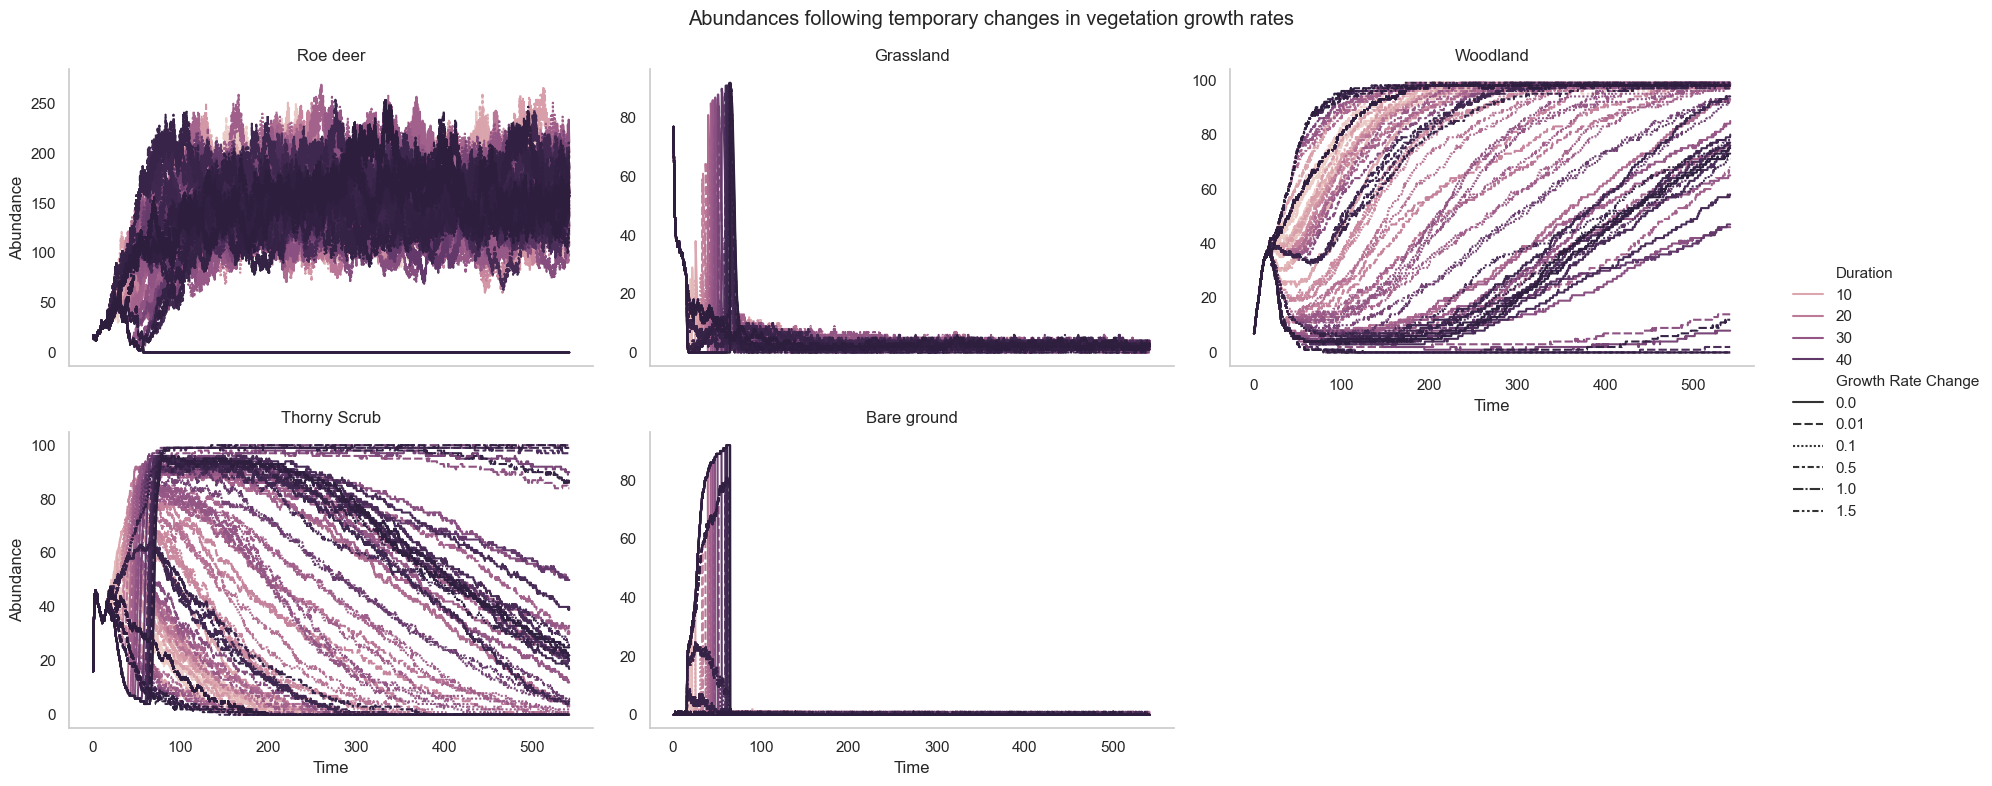

In [665]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(df, col='Ecosystem Element', col_wrap=3, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='Time', y='Abundance', hue='Duration', style='Growth Rate Change', ci=None, estimator = None)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Roe deer', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary changes in vegetation growth rates')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

In [669]:
x = df.loc[df["Time"] == 500]
y = x.loc[x["Growth Rate Change"] == 0]
y.loc[y["Ecosystem Element"] == "Roe deer"]

,index,Abundance,Run Number,Time,Ecosystem Element,Growth Rate Change,Duration
127322,127582,71,4,500.0,Woodland,0.0,26.916667
387002,387782,49,12,500.0,Woodland,0.0,44.333333
581762,582932,97,18,500.0,Woodland,0.0,4.000000
1036202,1038282,98,32,500.0,Woodland,0.0,2.833333
1166042,1168382,98,36,500.0,Woodland,0.0,5.750000
1230962,1233432,72,38,500.0,Woodland,0.0,45.583333
1360802,1363532,99,42,500.0,Woodland,0.0,1.083333
1523102,1526157,67,47,500.0,Woodland,0.0,48.833333
1750322,1753832,63,54,500.0,Woodland,0.0,44.250000
1945082,1948982,66,60,500.0,Woodland,0.0,49.250000


In [849]:
# what are the thresholds for collapse?
x = df.loc[df["Time"] == 500]
y = x.loc[x["Ecosystem Element"] == "Woodland"]
z = y.loc[y["Abundance"] == 0]
# z.loc[z["Growth Rate Change"] == 0.01]
z

,Abundance,Run Number,Time,Ecosystem Element,Growth Rate Change,Duration,State
30007,0,1,500.0,Woodland,0.01,45.833333,Undesirable
2599482,0,80,500.0,Woodland,0.01,36.000000,Undesirable
3087357,0,95,500.0,Woodland,0.01,48.666667,Undesirable


In [702]:
z = df.loc[df["Time"] == 500]
z.loc[z["Run Number"] == 79]

,index,Abundance,Run Number,Time,Ecosystem Element,Growth Rate Change,Duration
2561820,2566955,0,79,500.0,Roe deer,0.0,43.833333
2561821,2566956,3,79,500.0,Grassland,0.0,43.833333
2561822,2566957,70,79,500.0,Woodland,0.0,43.833333
2561823,2566958,27,79,500.0,Thorny Scrub,0.0,43.833333
2561824,2566959,0,79,500.0,Bare ground,0.0,43.833333


In [ ]:
# filter to one year
x = df.loc[df["time"] == 200]
x
# how many have the "no grass" end state?
y = x.loc[x["Variable"] == 'grasslandParkland']
y.loc[y["Value"] != 0]

In [552]:
df1s = pd.read_csv('abm_experiment_stochastic_1.csv').drop(['Unnamed: 0'], axis=1)
df2s = pd.read_csv('abm_experiment_stochastic_2.csv').drop(['Unnamed: 0'], axis=1)
df3s = pd.read_csv('abm_experiment_stochastic_3.csv').drop(['Unnamed: 0'], axis=1)
df4s = pd.read_csv('abm_experiment_stochastic_4.csv').drop(['Unnamed: 0'], axis=1)

dfs = pd.concat([df1s, df2s, df3s, df4s], axis=0).reset_index(drop=True)


In [822]:
df = pd.read_csv('experiment_linear_growth_test.csv').drop(['Unnamed: 0'], axis=1)


In [823]:
grouped_df = df.groupby(['Time', 'Ecosystem Element', 'Noise'])['Abundance'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()

In [824]:
grouped_df["Time"] = grouped_df['Time'].div(12)
# grouped_df = grouped_df.loc[grouped_df["Time"] >= 300].reset_index()
# grouped_df = grouped_df.loc[grouped_df["Time"] <= 600].reset_index()

In [825]:
grouped_df = grouped_df.loc[grouped_df['Ecosystem Element'].isin(['Roe deer', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'])]

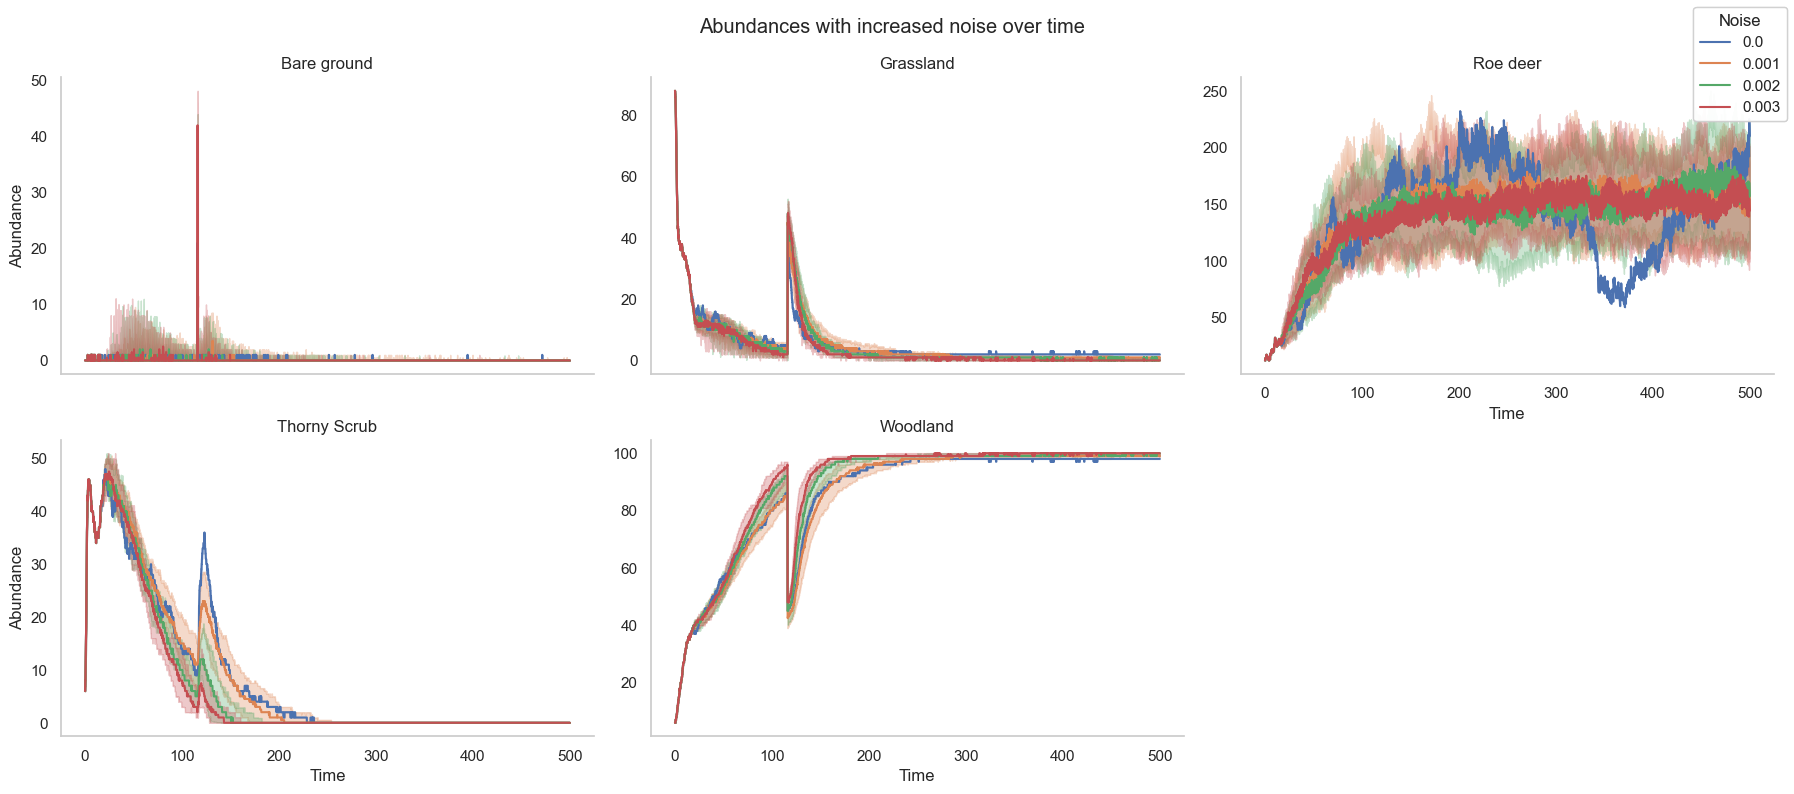

In [826]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(grouped_df, col='Ecosystem Element', col_wrap=3, height=4, aspect=1.5, hue="Noise", sharey=False)


# Iterate over each variable and plot the lines with fill_between
for variable, ax in zip(grouped_df['Ecosystem Element'].unique(), g.axes):
    # Filter the data for the specific variable
    data = grouped_df[grouped_df['Ecosystem Element'] == variable]
    
    # Get the unique noise levels for the variable
    noise_levels = data['Noise'].unique()
    
    # Iterate over each noise level and plot the fill between the percentiles
    for i, noise in enumerate(noise_levels):
        # Filter the data for the specific noise level
        noise_data = data[data['Noise'] == noise]
        
        # Get the values for the percentiles
        lower = noise_data[noise_data.columns[-2]].values
        upper = noise_data[noise_data.columns[-1]].values
        
        # Get the color for the line and fill_between
        line_color = sns.color_palette()[i]
        fill_color = line_color
        
        # Plot the line
        sns.lineplot(data=noise_data, x='Time', y='median', color=line_color, ax=ax, legend=False)
        
        # Plot the fill_between
        ax.fill_between(noise_data['Time'], lower, upper, alpha=0.3, color=fill_color)
    
    # Set the title for each subplot
    ax.set_title(variable)

# Set the overall title for the facetgrid
g.fig.suptitle("Abundances with increased noise over time")

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# # Set title for each subplot
# titles = ['Grassland', 'Roe deer','Thorny Scrub', 'Woodland']
# for ax, title in zip(g.axes.flat, titles):
#     ax.set_title(title)

# Adjust the spacing between subplots
g.fig.tight_layout()

# legend
handles, labels = [], []
for i, noise in enumerate(grouped_df['Noise'].unique()):
    line_color = sns.color_palette()[i]
    fill_color = line_color
    handles.append(plt.Line2D([], [], color=line_color, linestyle='-', label=noise))
    labels.append(noise)

# Add style information to the legend
# handles.extend([
#                 plt.Line2D([], [], color='black', linestyle='--', label='Optimised')])
# labels.extend(['Optimised'])

legend = g.fig.legend(handles, labels, title='Noise', loc='upper right')
plt.gca().add_artist(legend)

# Show the plot
plt.show()

# Timeseries for selected stocking densities

In [549]:
# stocking density of 1
df1_timeseries = pd.read_csv('abm_final_results_accepted_timeseries.csv').drop(["Unnamed: 0"], axis=1)
df1_timeseries = df1_timeseries.loc[df1_timeseries["run_number"] == 37968.0]
df1_timeseries["Stocking Density"] = 1
# reformat
final_df =  pd.DataFrame(
                (df1_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(df1_timeseries['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df1_timeseries)))
final_df["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df1_timeseries['Stocking Density'],10)], axis=0))

# 10x, 
df2_timeseries = pd.read_csv('abm_landscape_timeseries_stocking_density_10.csv').drop(["Unnamed: 0"], axis=1)
df2_timeseries["Stocking Density"] = 10
# reformat
final_df_1 =  pd.DataFrame(
                (df2_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_1["Time"] = pd.DataFrame(np.concatenate([np.repeat(df2_timeseries['Time'], 10)], axis=0))
final_df_1["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df2_timeseries)))
final_df_1["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df2_timeseries['Stocking Density'],10)], axis=0))


# 25x, 
df3_timeseries = pd.read_csv('abm_landscape_timeseries_stocking_density_25.csv').drop(["Unnamed: 0"], axis=1)
df3_timeseries["Stocking Density"] = 25
# reformat
final_df_2 =  pd.DataFrame(
                (df3_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_2["Time"] = pd.DataFrame(np.concatenate([np.repeat(df3_timeseries['Time'], 10)], axis=0))
final_df_2["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df3_timeseries)))
final_df_2["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df3_timeseries['Stocking Density'],10)], axis=0))


# 50x, 
df4_timeseries = pd.read_csv('abm_landscape_timeseries_stocking_density_50.csv').drop(["Unnamed: 0"], axis=1)
df4_timeseries["Stocking Density"] = 50
# reformat
final_df_3 =  pd.DataFrame(
                (df4_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_3["Time"] = pd.DataFrame(np.concatenate([np.repeat(df4_timeseries['Time'], 10)], axis=0))
final_df_3["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df4_timeseries)))
final_df_3["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df4_timeseries['Stocking Density'],10)], axis=0))


# 75x, 
df5_timeseries = pd.read_csv('abm_landscape_timeseries_stocking_density_75.csv').drop(["Unnamed: 0"], axis=1)
df5_timeseries["Stocking Density"] = 75
# reformat
final_df_4 =  pd.DataFrame(
                (df5_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_4["Time"] = pd.DataFrame(np.concatenate([np.repeat(df5_timeseries['Time'], 10)], axis=0))
final_df_4["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df5_timeseries)))
final_df_4["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df5_timeseries['Stocking Density'],10)], axis=0))


# 100x
df6_timeseries = pd.read_csv('abm_landscape_timeseries_stocking_density_100.csv').drop(["Unnamed: 0"], axis=1)
df6_timeseries["Stocking Density"] = 100
# reformat
final_df_5 =  pd.DataFrame(
                (df6_timeseries[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_5["Time"] = pd.DataFrame(np.concatenate([np.repeat(df6_timeseries['Time'], 10)], axis=0))
final_df_5["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df6_timeseries)))
final_df_5["Stocking Density"] = pd.DataFrame(np.concatenate([np.repeat(df6_timeseries['Stocking Density'],10)], axis=0))




df_combined = pd.concat([final_df, final_df_1, final_df_2, final_df_3, final_df_4, ], axis=0)

In [550]:
df_combined["Time"] = df_combined['Time'].div(12)
# df_temp = df_combined.loc[df_combined["Time"] > 510]

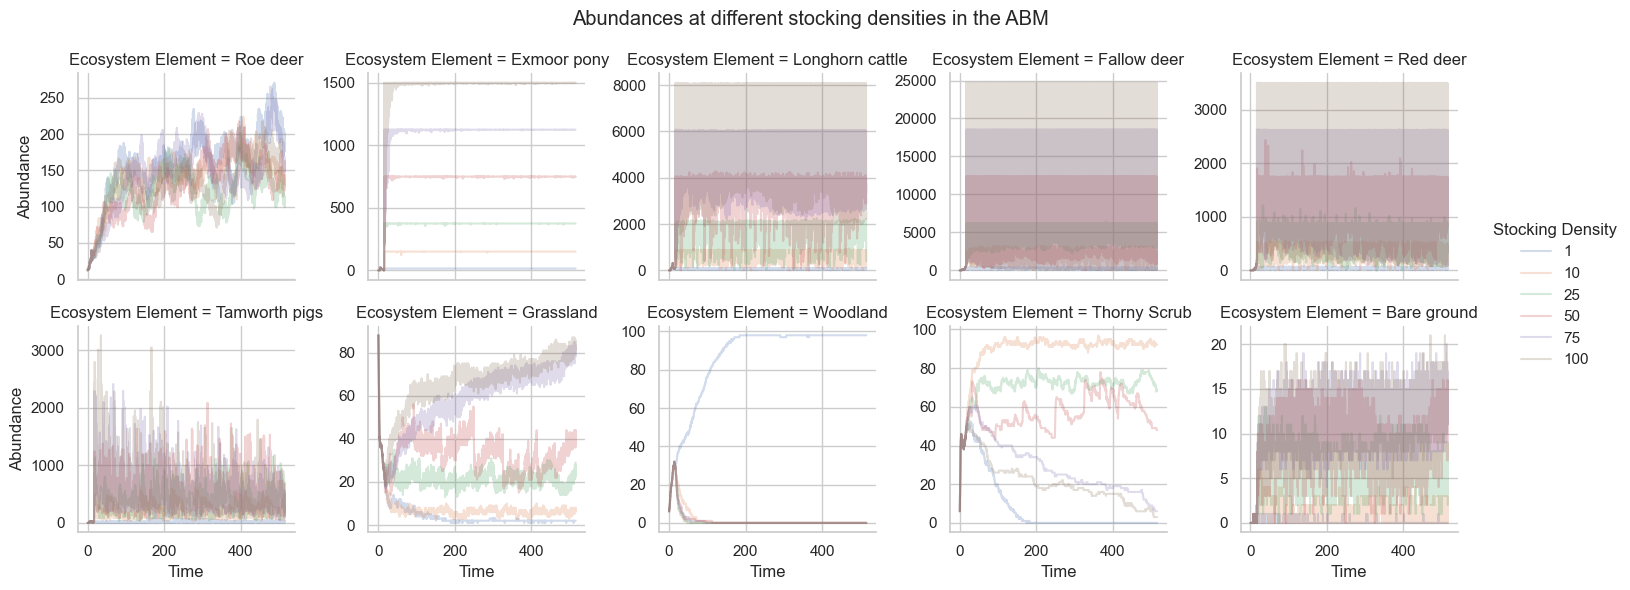

In [551]:
# conditions
f = sns.FacetGrid(df_combined, col="Ecosystem Element", hue="Stocking Density", col_wrap=5, sharey = False)
f.map(sns.lineplot, 'Time', 'Abundance', alpha=0.25)

# add legend
f.add_legend()

plt.suptitle('Abundances at different stocking densities in the ABM')

# Adjust spacing between subplots
f.tight_layout()

plt.show()

# GA 1 outputs - new insights

# GA 1 outputs - sensitivity test

In [ ]:
final_df_2 =  pd.DataFrame(
                (df_abm[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
final_df_2["Time"] = pd.DataFrame(np.concatenate([np.repeat(df_abm['Time'], 10)], axis=0))
final_df_2["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df_abm)))

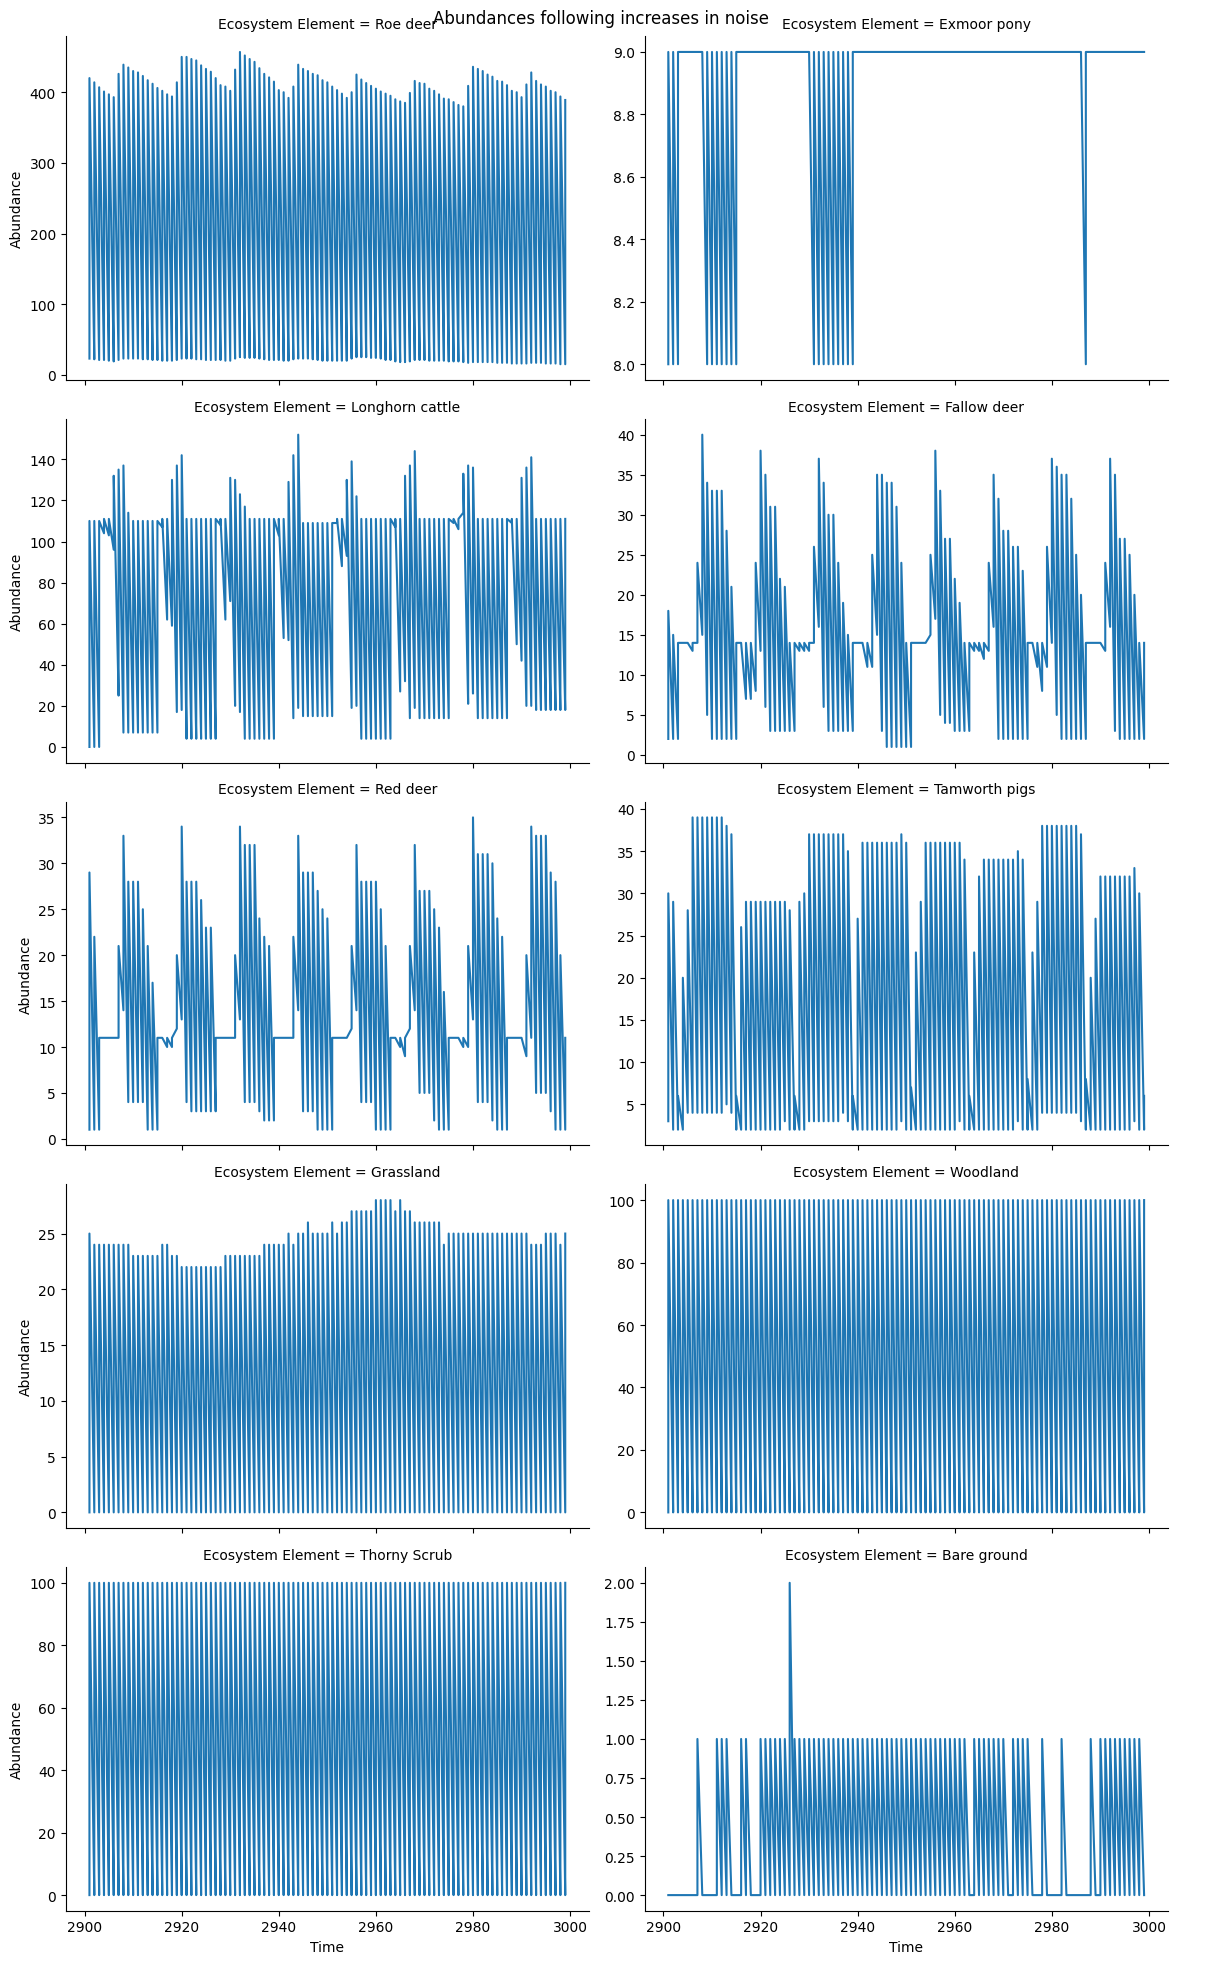

In [ ]:
final_df_2 = final_df_2.loc[final_df_2["Time"] > 2900]

# Create a FacetGrid with subplots
g = sns.FacetGrid(final_df_2, col='Ecosystem Element', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='Time', y='Abundance',  ci=None, estimator = None)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# add legend
g.add_legend()

plt.suptitle('Abundances following increases in noise')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

In [965]:
# current dynamics
current_dynamics_abm_df = pd.read_csv('abm_final_results_accepted_timeseries.csv').drop(["Unnamed: 0"], axis=1)
# reformat
current_dynamics_abm =  pd.DataFrame(
                (current_dynamics_abm_df[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
current_dynamics_abm["Time"] = pd.DataFrame(np.concatenate([np.repeat(current_dynamics_abm_df['Time'], 10)], axis=0))
current_dynamics_abm["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(current_dynamics_abm_df)))
current_dynamics_abm["Experiment"] = "Current dynamics"


# Woodland mosaic
df_woodland = pd.read_csv('ga1_all_timeseries_abm_woodland.csv').drop(['Unnamed: 0'], axis=1)
# # 33% grassland
df_grassland = pd.read_csv('ga1_all_timeseries_abm_grassland.csv').drop(['Unnamed: 0'], axis=1)
# 33 scrubland
df_scrubland = pd.read_csv('ga1_all_timeseries_abm_scrubland.csv').drop(['Unnamed: 0'], axis=1)
# no control
no_control_df = pd.read_csv('abm_no_control.csv')
# reformat
no_control =  pd.DataFrame(
                (no_control_df[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
no_control["Time"] = pd.DataFrame(np.concatenate([np.repeat(no_control_df['Time'], 10)], axis=0))
no_control["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(no_control_df)))
no_control["Experiment"] = "No control"



# concat them
combined_abm = pd.concat([df_woodland, df_scrubland, df_grassland, current_dynamics_abm, no_control])
end_ga = combined_abm.loc[combined_abm["Time"] == 2999]

In [969]:
end_ga = end_ga.sort_values("Ecosystem Element")

No control            50
Current dynamics    1000
33% Grassland       1000
Woodland Mosaic     1000
33% Scrubland       1000
Name: Experiment, dtype: int64

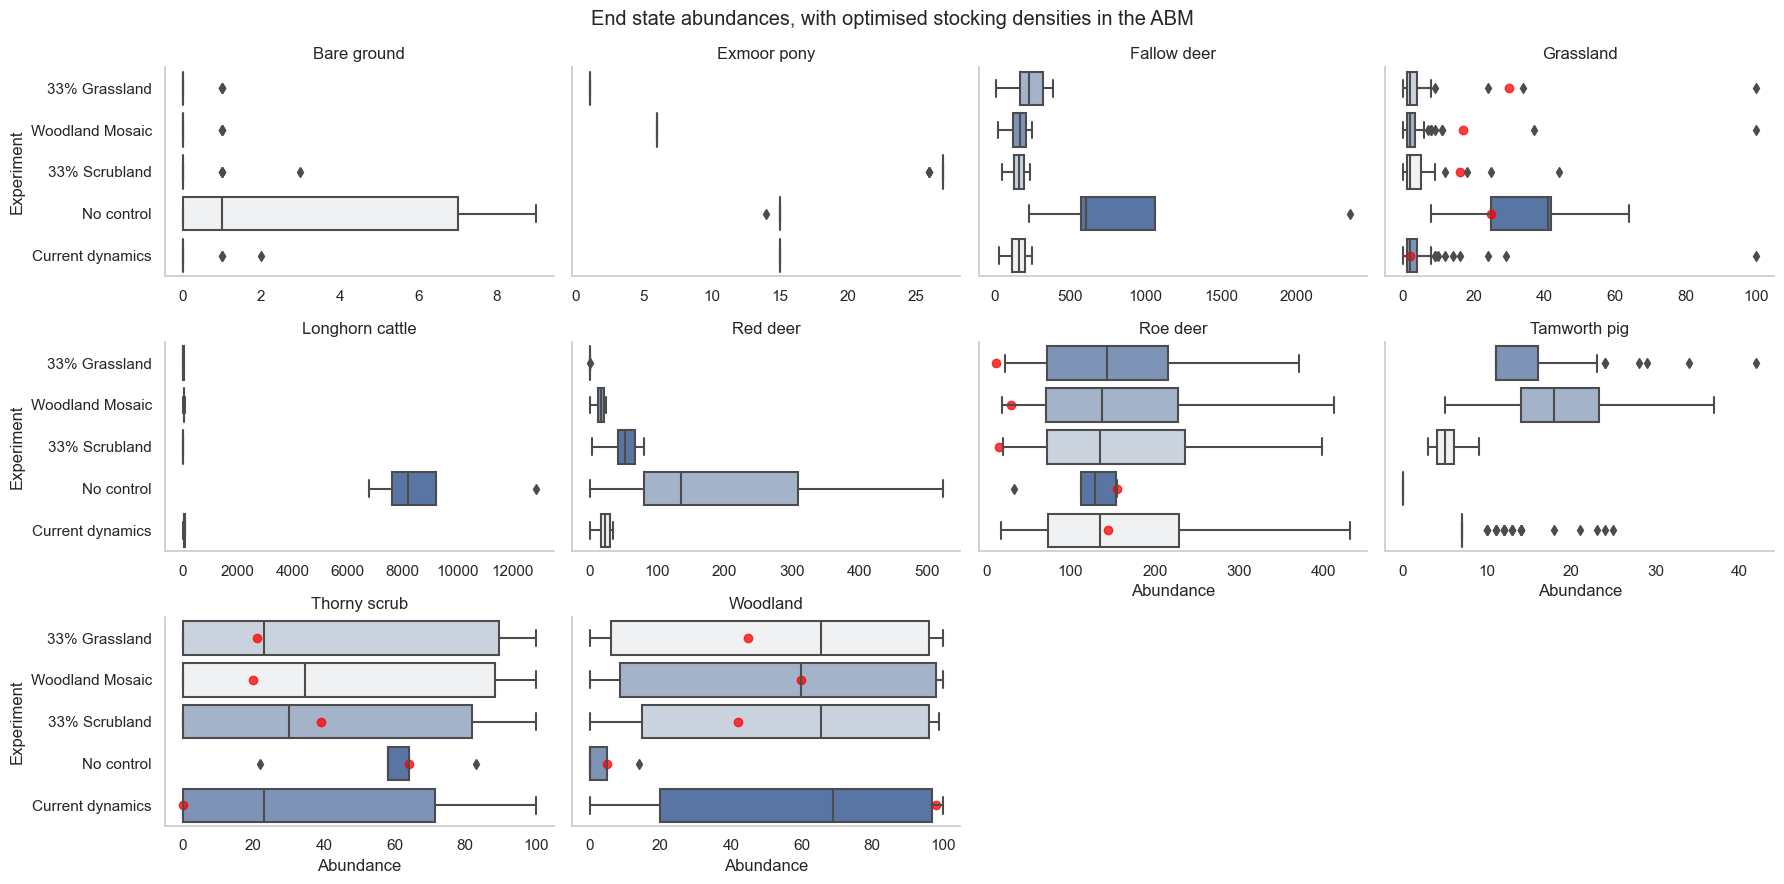

: 

In [973]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(end_ga, col='Ecosystem Element', col_wrap=4, height=3, aspect=1.5, sharey=True, sharex=False)


# Plot lineplot for each variable
g.map_dataframe(sns.boxplot, x='Abundance', y='Experiment', hue="Experiment", order = ["33% Grassland", "Woodland Mosaic","33% Scrubland", "No control", "Current dynamics"], dodge=False)


# Set axis labels
g.set_axis_labels('Abundance')


# Specify the locations for the red dots for each subplot
# Set title for each subplot
titles = ['Bare ground', 'Exmoor pony','Fallow deer','Grassland','Longhorn cattle','Red deer','Roe deer','Tamworth pig','Thorny scrub','Woodland']

red_dot_locations = {
    'Grassland': {
        '33% Grassland': {'x': [30], 'y': [0]},
        'Woodland Mosaic': {'x': [17], 'y': [1]}, 
        '33% Scrubland': {'x': [16], 'y': [2]},
        'No control': {'x': [25], 'y': [3]},
        'Current dynamics': {'x': [2], 'y': [4]}

    },
    'Roe deer': {
        '33% Grassland': {'x': [12], 'y': [0]},
        'Woodland Mosaic': {'x': [30], 'y': [1]}, 
        '33% Scrubland': {'x': [15], 'y': [2]},
        'No control': {'x': [155], 'y': [3]},
        'Current dynamics': {'x': [145], 'y': [4]}
            }, 
    'Thorny Scrub': {
        '33% Grassland': {'x': [21], 'y': [0]},
        'Woodland Mosaic': {'x': [20], 'y': [1]}, 
        '33% Scrubland': {'x': [39], 'y': [2]},
        'No control': {'x': [64], 'y': [3]},
        'Current dynamics': {'x': [0], 'y': [4]}
            }, 
    'Woodland': {
        '33% Grassland': {'x': [45], 'y': [0]},
        'Woodland Mosaic': {'x': [60], 'y': [1]}, 
        '33% Scrubland': {'x': [42], 'y': [2]},
        'No control': {'x': [5], 'y': [3]},
        'Current dynamics': {'x': [98], 'y': [4]}
            },        
}


# Iterate over each facet and add red dots at the specified locations
for ax, variable, title in zip(g.axes.flat, end_ga['Ecosystem Element'].unique(), titles):
    ax.set_title(title)
    locations = red_dot_locations.get(variable, {})
    for experiment, locs in locations.items():
        ax.scatter(locs['x'], locs['y'], color='red', alpha=0.75)

plt.suptitle('End state abundances, with optimised stocking densities in the ABM')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# GA for P2: Ecological resilience

In [910]:
# undesirable
df_first = pd.read_csv('experiment_ps1_all_100_runs.csv').drop(['Unnamed: 0'], axis=1)
df_undesirable = df_first.loc[(df_first['Time'] == 2999) & (df_first['Ecosystem Element'] == 'Woodland') & (df_first['Abundance'] == 0)]
df_undesirable = df_first.loc[df_first['Run Number'].isin(df_undesirable['Run Number'])]
df_undesirable["State"] = "Undesirable"

# original
df_original_df = pd.read_csv('abm_final_results_accepted_timeseries.csv').drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
# reformat
df_original = pd.DataFrame(
                (df_original_df[['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground']].values.flatten()), columns=['Abundance'])
df_original["Time"] = pd.DataFrame(np.concatenate([np.repeat(df_original_df['Time'], 10)], axis=0))
df_original["Ecosystem Element"] = pd.DataFrame(np.tile(['Roe deer', 'Exmoor pony', 'Longhorn cattle', 'Fallow deer', 'Red deer', 'Tamworth pigs', 'Grassland', 'Woodland', 'Thorny Scrub', 'Bare ground'], len(df_original_df)))
df_original["Duration"] = 0
df_original["State"] = "Original"

# optimised
df_optimised = pd.read_csv('experiment_ga_outputs_all_100_runs.csv').drop(['Unnamed: 0'], axis=1)
df_optimised["State"] = "Optimised"

# concat them
df = pd.concat([df_original, df_undesirable, df_optimised])

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_68999/2840006281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_undesirable["State"] = "Undesirable"


In [912]:
df_undesirable

,Abundance,Run Number,Time,Ecosystem Element,Experiment,State
0,12,1,0,Roe deer,Undesirable,Undesirable
1,0,1,0,Exmoor pony,Undesirable,Undesirable
2,0,1,0,Longhorn cattle,Undesirable,Undesirable
3,0,1,0,Fallow deer,Undesirable,Undesirable
4,0,1,0,Red deer,Undesirable,Undesirable
...,...,...,...,...,...,...
2970985,12,99,2999,Tamworth pigs,Undesirable,Undesirable
2970986,0,99,2999,Grassland,Undesirable,Undesirable
2970987,0,99,2999,Woodland,Undesirable,Undesirable
2970988,100,99,2999,Thorny Scrub,Undesirable,Undesirable


In [913]:
end_all = df.loc[df["Time"] == 2999]
end_all["Time"] = end_all['Time'].div(12)
end_all["Duration"] = end_all['Duration'].div(12)
end_all = end_all.loc[end_all['Ecosystem Element'].isin(['Roe deer', 'Grassland', 'Woodland', 'Thorny Scrub'])]

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_68999/1483102739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_all["Time"] = end_all['Time'].div(12)
/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_68999/1483102739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_all["Duration"] = end_all['Duration'].div(12)


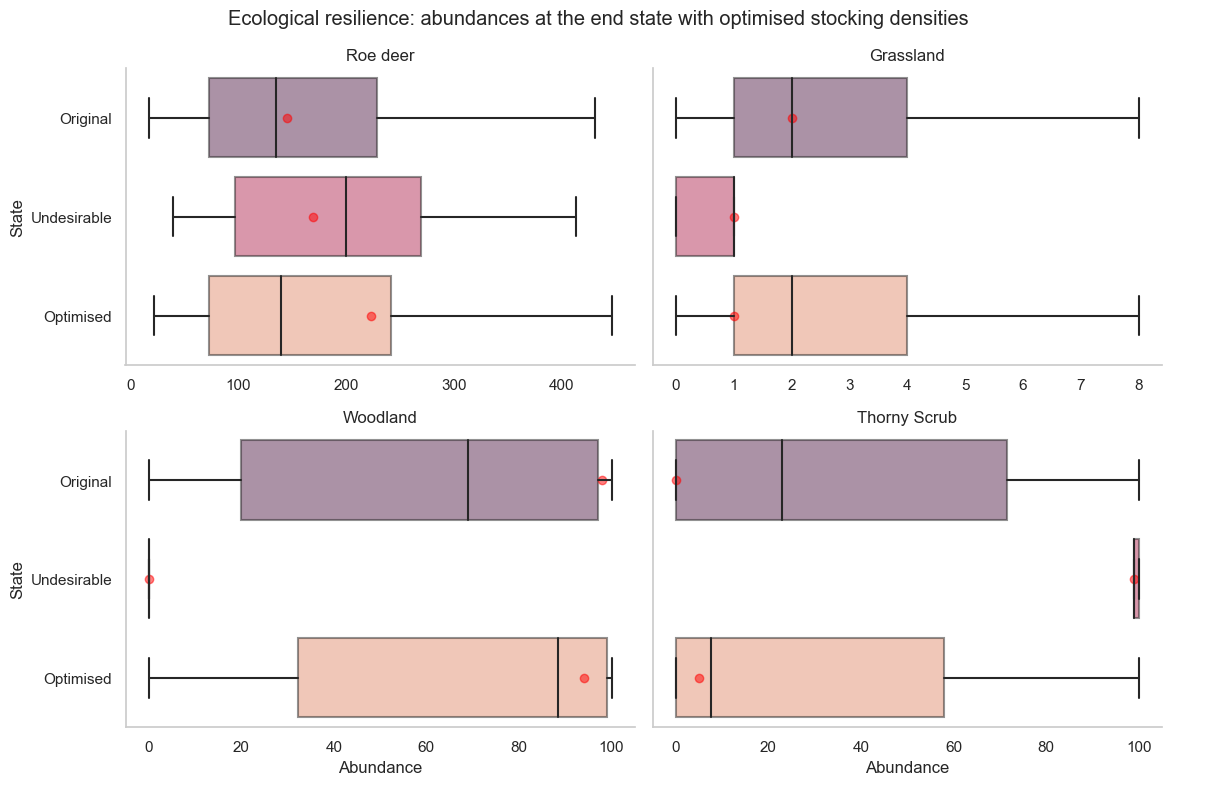

In [914]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(end_all, col='Ecosystem Element', col_wrap=2, height=4, aspect=1.5, sharey=True, sharex=False)

# Plot lineplot for each variable
g.map_dataframe(sns.boxplot, x='Abundance', y='State', dodge=False, boxprops=dict(alpha=.5), showfliers = False,  palette="rocket")

# Set axis labels
g.set_axis_labels('Abundance')


# short term
red_dot_locations = {
    'Roe deer': {
        'Original': {'x': [145], 'y': [0]},
        'Undesirable': {'x': [169], 'y': [1]},
        'Optimised': {'x': [223], 'y': [2]},

    },
    'Grassland': {
        'Original': {'x': [2], 'y': [0]},
        'Undesirable': {'x': [1], 'y': [1]},
        'Optimised': {'x': [1], 'y': [2]},
            }, 
    'Woodland': {
        'Original': {'x': [98], 'y': [0]},
        'Undesirable': {'x': [0], 'y': [1]},
        'Optimised': {'x': [94], 'y': [2]},
            }, 
    'Thorny Scrub': {
        'Original': {'x': [0], 'y': [0]},
        'Undesirable': {'x': [99], 'y': [1]},
        'Optimised': {'x': [5], 'y': [2]},
            },        
}


# Set title for each subplot
titles = ['Roe deer', 'Grassland', 'Woodland', 'Thorny Scrub']

for ax, variable, title in zip(g.axes.flat, end_all['Ecosystem Element'].unique(), titles):
    ax.set_title(title)
    locations = red_dot_locations.get(variable, {})
    for experiment, locs in locations.items():
        ax.scatter(locs['x'], locs['y'], color='red', alpha=0.5)



# add legend
g.add_legend()

plt.suptitle('Ecological resilience: abundances at the end state with optimised stocking densities')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()